In [39]:
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict
import os
import json
import pandas as pd
import numpy as np

matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams['figure.dpi'] = 300

In [40]:
df=pd.read_pickle('scheduler_compare_result_ganeshprofiles.pdpickle')

In [46]:
os.makedirs('paper_results', exist_ok=True)
outdir = os.path.join('.', 'paper_results')

In [41]:
schedulers_to_test = list(df.columns)[3:]
print(schedulers_to_test)

['fair_naive', 'fair_sco', 'thief', 'inference_only']


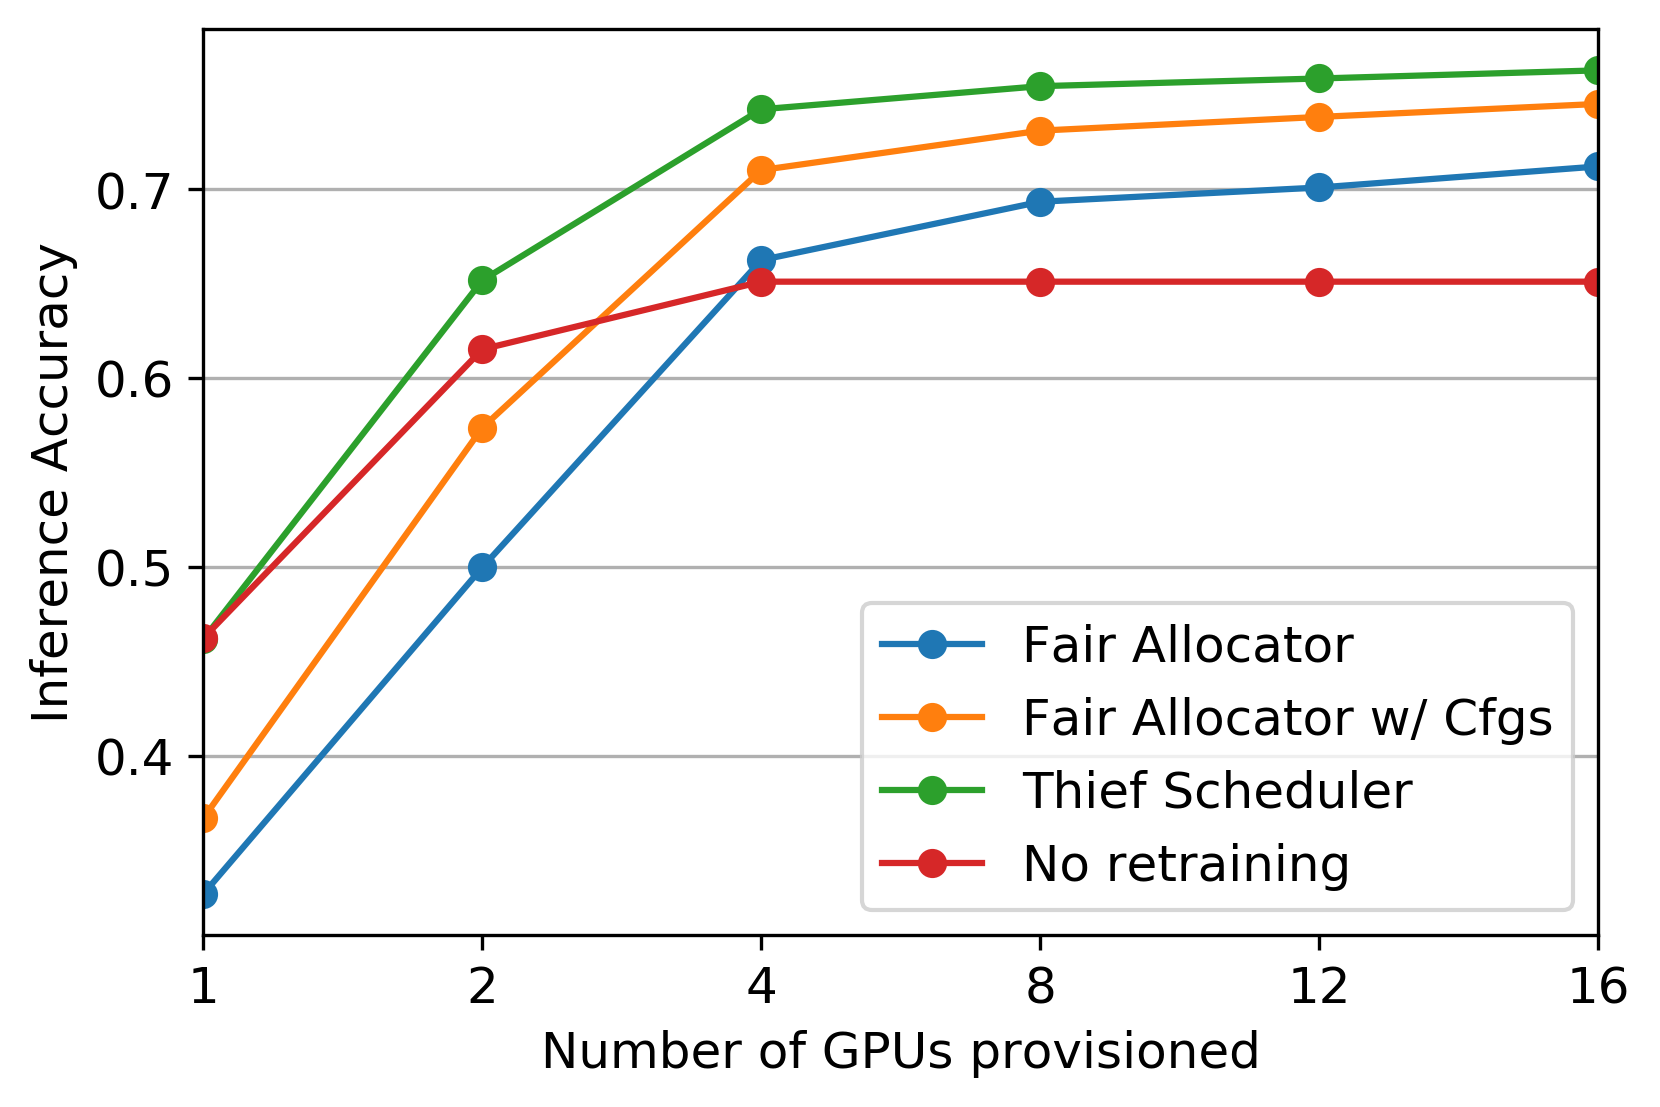

In [51]:
for PERIOD in [100]:#, 100]:#, 100, 200, 400]:
    sched_names = [sched_name for sched_name in schedulers_to_test if sched_name!='fair_random']
    const_res_data = df[df['period'] == PERIOD]
    ax = const_res_data.plot(y=sched_names, kind='line',
                        # title ="Scheduler comparison,\n{}s retraining period".format(len(camera_names), PERIOD),
                        label=['Fair Allocator', 'Fair Allocator w/ Cfgs', 'Thief Scheduler', 'No retraining'],
                        legend=True, marker='o')
    ax.set_xlabel("Number of GPUs provisioned")
    ax.set_ylabel("Inference Accuracy")
    ax.set_xticklabels(df['resources'])
    ax.legend(loc='lower right')
    ax.grid(axis='y')
    file_name = 'schedcompare_10cams.pdf'
    plt.savefig(os.path.join(outdir, file_name))